In [198]:
%matplotlib inline
import PIL
import tqdm
import pickle
import numpy as np
import matplotlib.pyplot as plt
#from torchvision import datasets
from skimage.filters import gabor
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
import glob
import cv2
import os
from PIL import Image

In [199]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

In [200]:
#Capture images and labels into arrays.
#Start by creating empty lists.
#SIZE = 128
train_images=[]
train_images_topleft = []
train_images_topRight = []
train_images_bottomLeft = []
train_images_bottomRight = []
train_labels = [] 
final_images=[]
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob(r"C:/Users/fsshi/jupyter notebooks/train2/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(os.path.basename(img_path))
        imm= cv2.imread(img_path, 1) #Reading color images
        im = cv2.filter2D(src=imm, ddepth=-1, kernel=kernel)
        print(im.shape)
        h,w= im.shape[:2]
        print(h)
        print(w)
        centerX,centerY=(w//2), (h//2)
    
        topLeft = im[0:centerY,0:centerX]
        topRight = im[0:centerY,centerX:w]
        bottomLeft = im[centerY:h,0:centerX]
        bottomRight = im[centerY:h,centerX:w]
        
        train_images_topleft.append(topLeft)
        train_images_topRight.append(topRight)
        train_images_bottomLeft.append(bottomLeft)
        train_images_bottomRight.append(bottomRight)
        final_images=train_images_topleft+train_images_topRight+train_images_bottomLeft+train_images_bottomRight
     
        #img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        train_images.append(im)
        train_labels.append(label)
        
#train_images = np.array(train_images)
#train_labels = np.array(train_labels)

A-D-08DIP-01B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-01F-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-02B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-02F-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-03B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-03F-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-04B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-04F-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-05B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-05F-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-06B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-06F-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-07B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-07F-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-08B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-08F-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-09B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-09F-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-10B-SM.png
(1920, 2560, 3)
1920
2560
A-D-08DIP-10F-SM.png
(1920, 2560, 3)
1920
2560
A-D-16SOIC-06B-D.PNG
(1920, 2560, 3)
1920
2560
A-D-16SOIC-06

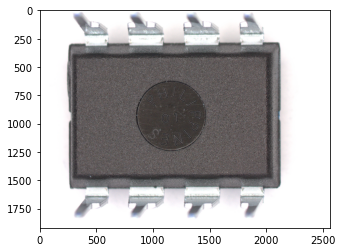

In [201]:
train_images[0].shape
import matplotlib.pyplot as plt
imgplot = plt.imshow(train_images[10])
plt.show()

In [202]:
import pandas as pd
featLength = 2+5+2
trainFeats = np.zeros((len(train_images_bottomRight),featLength)) #Feature vector of each image is of size 1x1030
for tr in tqdm.tqdm_notebook(range(len(train_images_bottomRight))):

    img = train_images_bottomRight[tr][0] #One image at a time
    #print(img.shape)
    img = Image.fromarray(img)
    img_gray = img.convert('L') #Converting to grayscale
    img_arr = np.array(img.getdata()).reshape(img.size[1],img.size[0]) #Converting to array
    # LBP
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[0]*img.size[1])
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype=float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))   
    # GLCM
    gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True)
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
    homogeneity = greycoprops(gCoMat, prop='homogeneity')    
    energy = greycoprops(gCoMat, prop='energy')
    correlation = greycoprops(gCoMat, prop='correlation')    
    feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
    # Gabor filter
    gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
    gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist,dtype=float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
    # Concatenating features(2+5+2)    
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]),axis=0)
    trainFeats[tr,:] = concat_feat #Stacking features vectors for each image
    df4 = pd.DataFrame({'lbp_energy': trainFeats[:,0],
                       'lbp_entropy': trainFeats[:,1],
                       #'contrast': trainFeats[:,2],
                       'dissimilarity': trainFeats[:,3],
                       'homogeneity': trainFeats[:,4],
                       'energy': trainFeats[:,5],
                       'correlation': trainFeats[:,6],
                       'gabor_energy': trainFeats[:,7],
                       'gabor_entropy': trainFeats[:,8]})
    
    # Class label
    #label.append(trainDset[tr][1])
#trainLabel = np.array(label) #Conversion from list to array

C:\Users\fsshi\AppData\Local\Temp/ipykernel_5448/2252969160.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tr in tqdm.tqdm_notebook(range(len(train_images_bottomRight))):


  0%|          | 0/120 [00:00<?, ?it/s]

C:\Users\fsshi\AppData\Local\Temp/ipykernel_5448/2252969160.py:17: RuntimeWarning: divide by zero encountered in log2
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
C:\Users\fsshi\AppData\Local\Temp/ipykernel_5448/2252969160.py:17: RuntimeWarning: invalid value encountered in multiply
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
C:\Users\fsshi\AppData\Local\Temp/ipykernel_5448/2252969160.py:33: RuntimeWarning: divide by zero encountered in log2
  gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
C:\Users\fsshi\AppData\Local\Temp/ipykernel_5448/2252969160.py:33: RuntimeWarning: invalid value encountered in multiply
  gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))


In [203]:
df4.head()

,lbp_energy,lbp_entropy,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy
0,0.241442,2.208509,13.638281,0.126870,0.070312,0.969883,0.448629,1.725035
1,0.248150,2.170305,13.502344,0.090252,0.024532,0.964250,0.323332,2.150302
2,0.226332,2.270439,12.981250,0.185180,0.127001,0.974626,0.358739,1.969591
3,0.251174,2.163145,14.022656,0.071792,0.024269,0.952578,0.375709,1.982665
4,0.228128,2.264891,12.669531,0.178885,0.106286,0.975467,0.365525,2.006555


In [204]:
df4 = (df4-df4.min())/(df4.max()-df4.min())

In [205]:
type(trainFeats)

numpy.ndarray

In [206]:
df4.head()

,lbp_energy,lbp_entropy,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy
0,0.225405,0.697837,0.178689,0.125662,0.047636,0.972793,0.301194,0.703245
1,0.249937,0.666079,0.176908,0.088993,0.000660,0.967704,0.136518,0.887767
2,0.170147,0.749319,0.170080,0.184053,0.105804,0.977077,0.183053,0.809357
3,0.260994,0.660127,0.183725,0.070508,0.000390,0.957159,0.205357,0.815030
4,0.176717,0.744706,0.165996,0.177749,0.084549,0.977837,0.191972,0.825396


In [207]:
trainFeats.shape

(120, 9)

In [208]:
train_labels = np.array(train_labels)

In [209]:
type(train_labels)

numpy.ndarray

In [210]:
train_labels

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1'], dtype='<U1')

In [211]:
from sklearn.svm import SVC

In [212]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y_train, y_test = train_test_split(df4, train_labels, test_size=0.2, random_state=42,shuffle=True )

In [236]:
SVM_model = SVC(C=1)
SVM_model.fit(X_train, y_train)

SVC(C=1)

In [237]:
test_prediction = SVM_model.predict(X_test)

In [238]:
test_prediction

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0'], dtype='<U1')

In [239]:
y_test

array(['0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1'], dtype='<U1')

In [240]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction))
print(classification_report(y_test, test_prediction))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_prediction)

Accuracy =  0.75
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.25      0.40         8

    accuracy                           0.75        24
   macro avg       0.86      0.62      0.62        24
weighted avg       0.82      0.75      0.69        24



In [241]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()



In [242]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.7        0.68421053 0.63157895 0.52631579 0.63157895]
Average CV Score:  0.6347368421052633
Number of CV Scores used in Average:  5


In [243]:
# Model training
model.fit(X_train, y_train)
yhat_prob = model.predict_proba(X_test)
print('Predicted Probabilities: ', yhat_prob)
# Predict Output
predicted = model.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

Predicted Probabilities:  [[8.10259389e-01 1.89740611e-01]
 [8.71021138e-01 1.28978862e-01]
 [9.95985176e-01 4.01482416e-03]
 [8.72050118e-01 1.27949882e-01]
 [9.48727739e-01 5.12722611e-02]
 [8.84309889e-01 1.15690111e-01]
 [9.09867237e-01 9.01327630e-02]
 [9.88662881e-01 1.13371192e-02]
 [8.48252987e-01 1.51747013e-01]
 [9.35849156e-01 6.41508443e-02]
 [9.80999390e-01 1.90006104e-02]
 [8.90698961e-01 1.09301039e-01]
 [9.97223496e-01 2.77650438e-03]
 [8.73445611e-01 1.26554389e-01]
 [9.95952651e-01 4.04734859e-03]
 [2.61626837e-01 7.38373163e-01]
 [5.37485455e-07 9.99999463e-01]
 [9.95099258e-01 4.90074201e-03]
 [9.87286585e-01 1.27134150e-02]
 [8.55888827e-03 9.91441112e-01]
 [8.92607562e-01 1.07392438e-01]
 [8.81846235e-01 1.18153765e-01]
 [9.74396582e-01 2.56034177e-02]
 [9.11507496e-01 8.84925036e-02]]
Actual Value: ['0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '1' '1' '0'
 '1' '1' '0' '0' '0' '1']
Predicted Value: ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0

In [244]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)
print(classification_report(y_pred, y_test))

Accuracy: 0.7916666666666666
F1 Score: 0.8249385749385749
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        21
           1       0.38      1.00      0.55         3

    accuracy                           0.79        24
   macro avg       0.69      0.88      0.71        24
weighted avg       0.92      0.79      0.82        24



In [286]:
import pickle
pickle.dump(model, open('nv_model.pkl', 'wb'))

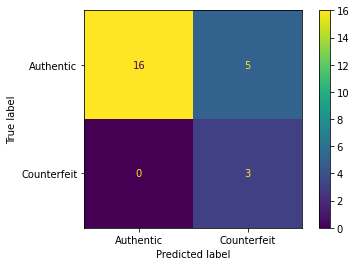

In [283]:
confusion_matrix = metrics.confusion_matrix(y_pred, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Authentic', 'Counterfeit'])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [273]:
#Capture images and labels into arrays.
#Start by creating empty lists.
#SIZE = 128
test_images=[]
train_images_topleft = []
train_images_topRight = []
train_images_bottomLeft = []
test_images_bottomRight = []
test_labels = [] 
final_images=[]
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob(r"C:/Users/fsshi/jupyter notebooks/test/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(os.path.basename(img_path))
        imm= cv2.imread(img_path, 1) #Reading color images
        im = cv2.filter2D(src=imm, ddepth=-1, kernel=kernel)
        print(im.shape)
        h,w= im.shape[:2]
        print(h)
        print(w)
        centerX,centerY=(w//2), (h//2)
    
        topLeft = im[0:centerY,0:centerX]
        topRight = im[0:centerY,centerX:w]
        bottomLeft = im[centerY:h,0:centerX]
        bottomRight = im[centerY:h,centerX:w]
        
        train_images_topleft.append(topLeft)
        train_images_topRight.append(topRight)
        train_images_bottomLeft.append(bottomLeft)
        test_images_bottomRight.append(bottomRight)
        final_images=train_images_topleft+train_images_topRight+train_images_bottomLeft+train_images_bottomRight
     
        #img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        test_images.append(im)
        test_labels.append(label)

A-O-08DIP-21B-D.png
(1920, 2560, 3)
1920
2560
A-O-08DIP-21F-D.png
(1920, 2560, 3)
1920
2560
C-T-48QFP-39F-D.png
(1920, 2560, 3)
1920
2560
C-T-64QFP-40B-D.png
(1920, 2560, 3)
1920
2560
C-T-64QFP-40F-D.png
(1920, 2560, 3)
1920
2560
C-T-64QFP-41B-D.png
(1920, 2560, 3)
1920
2560
C-T-64QFP-41F-D.png
(1920, 2560, 3)
1920
2560


In [274]:
import pandas as pd
featLength = 2+5+2
trainFeats = np.zeros((len(test_images_bottomRight),featLength)) #Feature vector of each image is of size 1x1030
for tr in tqdm.tqdm_notebook(range(len(test_images_bottomRight))):

    img = test_images_bottomRight[tr][0] #One image at a time
    #print(img.shape)
    img = Image.fromarray(img)
    img_gray = img.convert('L') #Converting to grayscale
    img_arr = np.array(img.getdata()).reshape(img.size[1],img.size[0]) #Converting to array
    # LBP
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[0]*img.size[1])
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype=float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))   
    # GLCM
    gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True)
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
    homogeneity = greycoprops(gCoMat, prop='homogeneity')    
    energy = greycoprops(gCoMat, prop='energy')
    correlation = greycoprops(gCoMat, prop='correlation')    
    feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
    # Gabor filter
    gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
    gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist,dtype=float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
    # Concatenating features(2+5+2)    
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]),axis=0)
    trainFeats[tr,:] = concat_feat #Stacking features vectors for each image
    df_test = pd.DataFrame({'lbp_energy': trainFeats[:,0],
                       'lbp_entropy': trainFeats[:,1],
                       #'contrast': trainFeats[:,2],
                       'dissimilarity': trainFeats[:,3],
                       'homogeneity': trainFeats[:,4],
                       'energy': trainFeats[:,5],
                       'correlation': trainFeats[:,6],
                       'gabor_energy': trainFeats[:,7],
                       'gabor_entropy': trainFeats[:,8]})
    
    # Class label
    #label.append(trainDset[tr][1])
#trainLabel = np.array(label) #Conversion from list to array

C:\Users\fsshi\AppData\Local\Temp/ipykernel_5448/24351594.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tr in tqdm.tqdm_notebook(range(len(test_images_bottomRight))):


  0%|          | 0/7 [00:00<?, ?it/s]

C:\Users\fsshi\AppData\Local\Temp/ipykernel_5448/24351594.py:17: RuntimeWarning: divide by zero encountered in log2
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
C:\Users\fsshi\AppData\Local\Temp/ipykernel_5448/24351594.py:17: RuntimeWarning: invalid value encountered in multiply
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))


In [275]:
df_test

,lbp_energy,lbp_entropy,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy
0,0.299476,1.842318,2.380469,0.705139,0.672815,0.996163,0.232923,2.257424
1,0.298885,1.863958,1.785156,0.766721,0.736328,0.997026,0.265418,2.204324
2,0.310194,1.810624,2.335938,0.887873,0.885187,0.989178,0.425524,1.647605
3,0.453250,1.369035,11.121094,0.012716,0.420540,0.876012,0.219459,2.346065
4,0.303384,1.853666,5.303125,0.824592,0.821142,0.972917,0.319846,1.942697
5,0.433270,1.564371,4.393750,0.817635,0.815680,0.933130,0.790666,0.709375
6,0.293758,1.944066,4.400781,0.828266,0.814192,0.986131,0.308782,1.924610


In [276]:
test = SVM_model.predict(df_test)

In [277]:
test

array(['1', '1', '1', '1', '1', '1', '1'], dtype='<U1')

In [278]:
test_labels

['0', '0', '1', '1', '1', '1', '1']

In [279]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(test, test_labels))
print(classification_report(test, test_labels))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test, test_labels)

Accuracy =  0.7142857142857143
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.71      0.83         7

    accuracy                           0.71         7
   macro avg       0.50      0.36      0.42         7
weighted avg       1.00      0.71      0.83         7



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [280]:
yhat_test = model.predict(df_test)

In [281]:
yhat_test

array(['1', '1', '1', '1', '1', '1', '1'], dtype='<U1')